# **IMPORT DATASET**

In [65]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


# **IMPORT LIBS**

In [66]:
import os
import pandas as pd
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [67]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


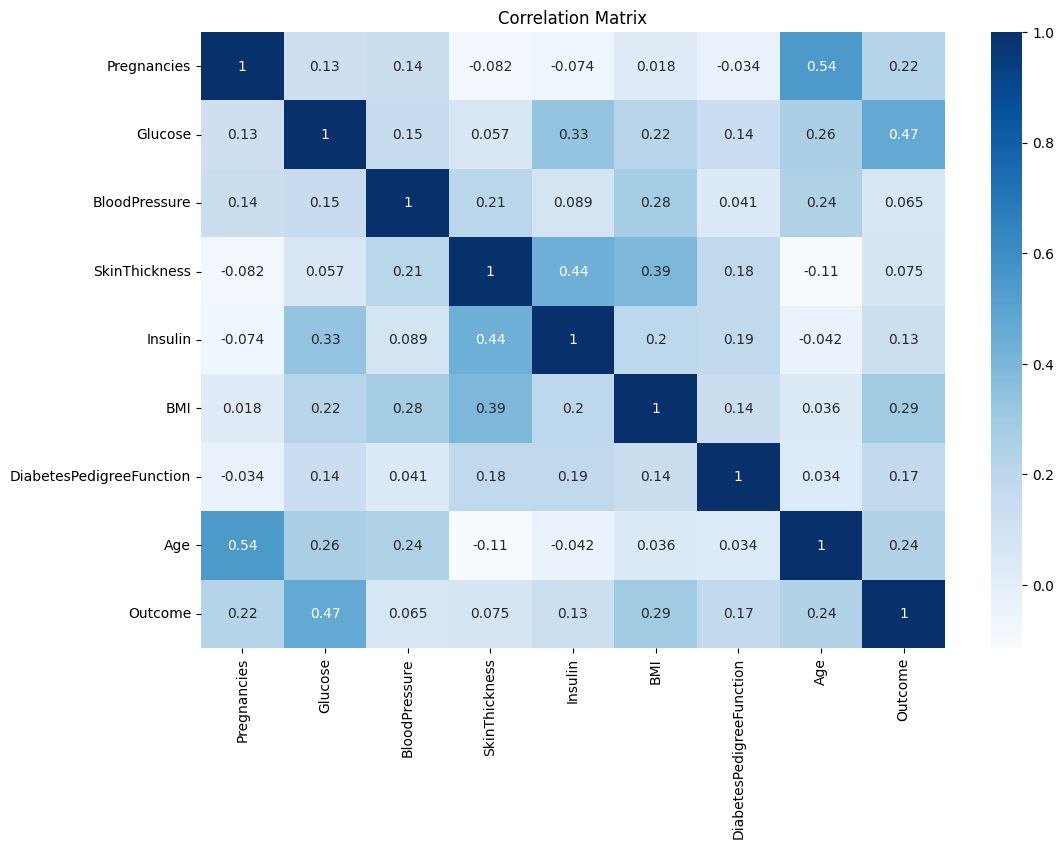

In [72]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap="Blues")
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Matrix')
plt.show()

In [73]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [74]:
graph = px.treemap(df, path=['Outcome', 'Glucose'])
graph.show()

In [75]:
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel ='rbf', random_state = 42, C = 2.0),
    'Neural Network': MLPClassifier(max_iter=1500, verbose=False, tol=0.00000100)
}

In [76]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[ 'Outcome']

# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
X_train, X_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 60             2       84              0              0        0   0.0   
 618            9      112             82             24        0  28.2   
 346            1      139             46             19       83  28.7   
 294            0      161             50              0        0  21.9   
 231            6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 60                      0.304   21  
 618                  

In [78]:
z_score_train = StandardScaler()
z_score_test = StandardScaler()

In [79]:
X_train_p = z_score_train.fit_transform(X_train)
X_test_p = z_score_test.fit_transform(X_test)

In [80]:
X_train = X_train_p
X_test = X_test_p

X_train, X_test

(array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
         -0.49073479, -1.03594038],
        [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
          2.41502991,  1.48710085],
        [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
          0.54916055, -0.94893896],
        ...,
        [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
          1.981245  ,  0.44308379],
        [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
         -0.78487662, -0.33992901],
        [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
         -0.61552223, -1.03594038]]),
 array([[ 0.49124165, -0.72667791, -0.44147615, ...,  0.23374785,
         -0.17094071,  0.66661154],
        [-0.63368347, -0.28534901,  0.31890843, ...,  0.43537945,
         -1.08608042, -1.07335756],
        [-0.63368347, -0.41144298, -0.17310512, ..., -0.14579397,
         -1.05362866, -1.07335756],
        ...,
        [ 1.05370422, -0.82124838,  0.18472291, ...,  

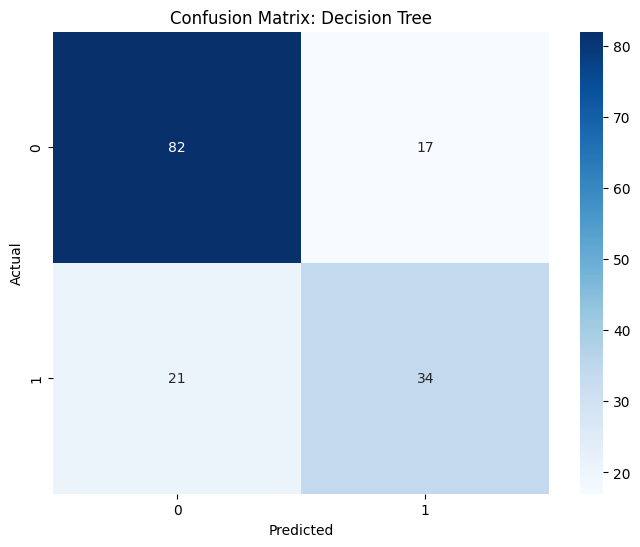

Decision Tree classification report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

[[76 23]
 [20 35]]


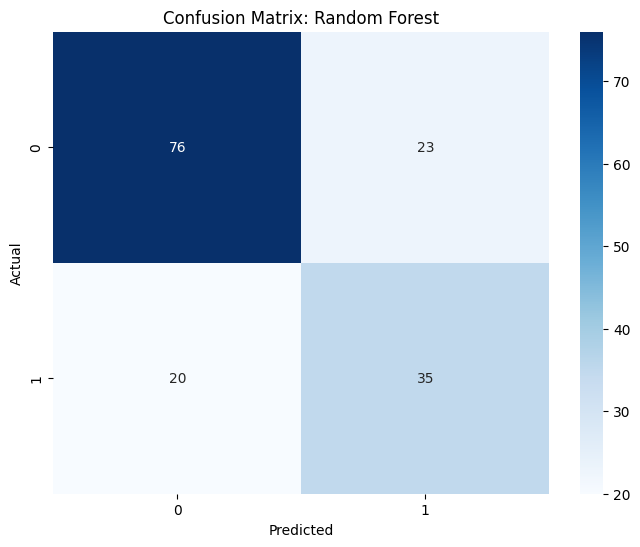

Random Forest classification report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

[[83 16]
 [21 34]]


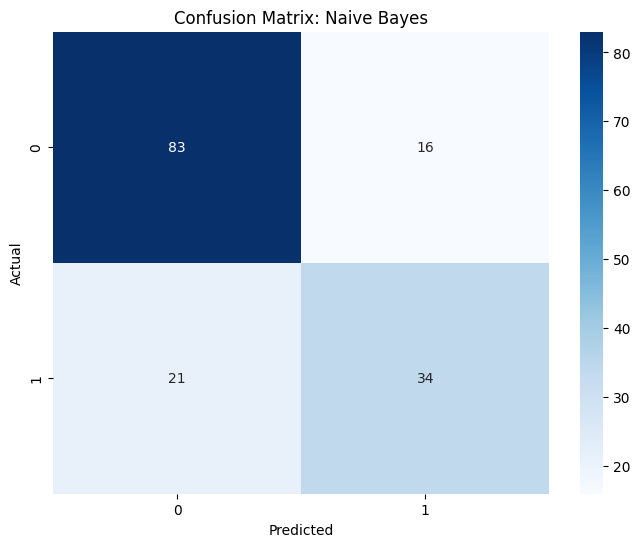

Naive Bayes classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

[[84 15]
 [17 38]]


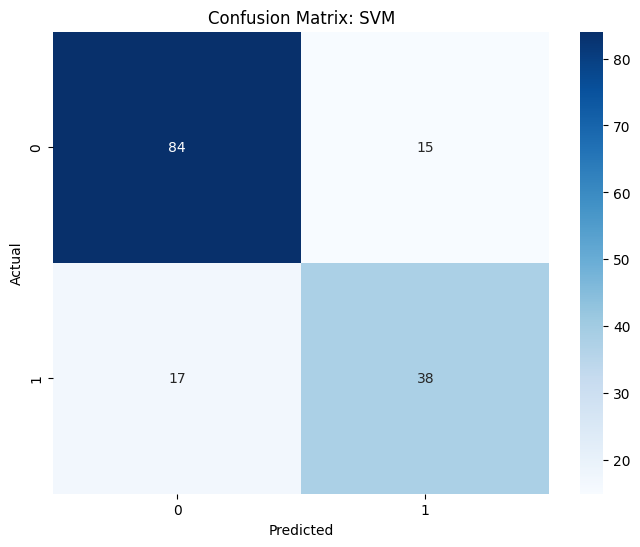

SVM classification report
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154

[[82 17]
 [26 29]]


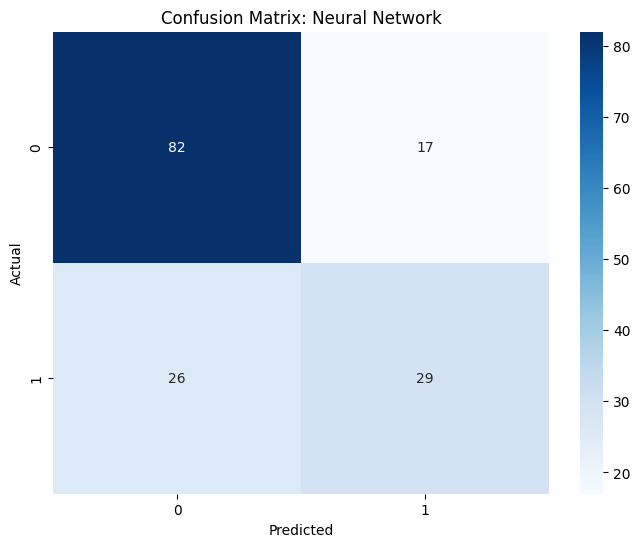

Neural Network classification report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154

[[80 19]
 [22 33]]


In [81]:
for name, model in models.items():
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels = ['0', '1'],
              yticklabels = ['0', '1'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix: " + name)
  plt.show()
  print(name + " classification report")
  model.fit(X_train, y_train)
  predicts = model.predict(X_test)
  print(classification_report(y_test, predicts))
  cm = confusion_matrix(y_test, predicts)
  print(confusion_matrix(y_test, predicts))